# 3. Метрики и Поиск

## Матрица ошибок. Двухклассовая классификация
- $TP$ = кол-во пар, где: $y_{predicted} = 1$, $y_{real} = 1$
- $FP$ = кол-во пар, где: $y_{predicted} = 1$, $y_{real} = 0$ (ошибки первого рода)
- $TN$ = кол-во пар, где: $y_{predicted} = 0$, $y_{real} = 0$
- $FN$ = кол-во пар, где: $y_{predicted} = 0$, $y_{real} = 1$ (ошибки второго рода)

Первая буква - совпадает ли реальность с классификацией. Вторая - Что выдал классификатор.


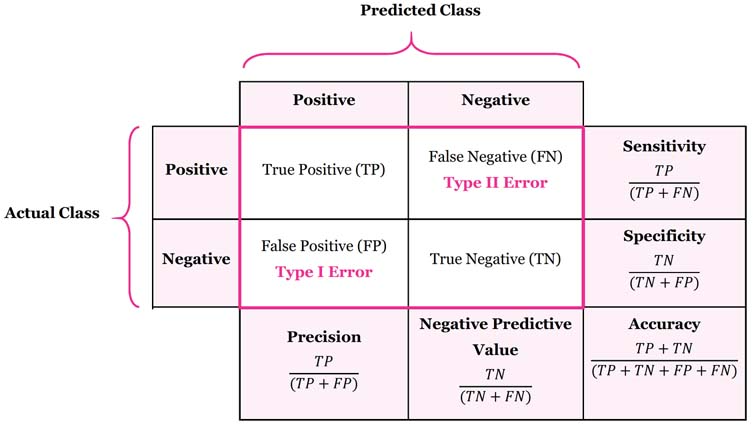

In [2]:
from sklearn.metrics import confusion_matrix
import numpy as np


y_real = np.array([0, 1, 0, 0, 1, 1, 1, 1])
y_pred = np.array([0, 1, 1, 0, 1, 1, 0, 0])

M = confusion_matrix(y_real, y_pred)
M

array([[2, 1],
       [2, 3]])

## Характеристики бинарного классификатора

$$accuracy = ACC = \frac{TP + TN}{TP + TN + FP + FN}$$

$$recall = TPR = \frac{TP}{TP + FN},\quad SPC = \frac{TN}{TN + FP}$$

$$precision = PPV = \frac{TP}{TP + FP},\quad FPR= \frac{FP}{TN + FP},$$

$$F_1 = 2\frac{precision\cdot recall}{precision + recall}, \quad F_{\beta} = (1 + \beta^2)\frac{precision\cdot recall}{\beta^2precision + recall}$$

$ACC$ (`Accuracy`) - доля верно классифицированных примеров среди всех примеров. Основная характеристика качества классификации.

$TPR$ (True positive rate, `recall`, `полнота`) - доля верно классифицированных положительных примеров среди всех положительных примеров.

$SPC$ (Specificity, true negative rate) - доля верно классифицированных отрицательных примеров среди всех отрицательных примеров.

$PPV$ (Positive predictive value, `precision`, `точность`) - доля верно классифицированных положительных примеров среди всех примеров, классифицированных положительно.

$FPR$ (False positive rate) - доля ошибочно классифицированных отрицательных примеров среди всех отрицательных примеров.

$F_1$ (F1-measure) - среднее гармоническое точности и полноты. Позволяет учесть обе характеристики одновременно.


$F_{beta}$ (Fbeta-measure) - $F_1$ c возможностью контролировать важность точности или полноты относительно друг друга.

Подробно про метрики классификации можно почитать [тут](https://alexanderdyakonov.wordpress.com/2019/05/31/%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D0%BE%D0%BD%D0%B0%D0%BB%D1%8B-%D0%BA%D0%B0%D1%87%D0%B5%D1%81%D1%82%D0%B2%D0%B0-%D0%B2-%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%D0%B5-%D0%B1%D0%B8%D0%BD%D0%B0%D1%80%D0%BD/), а про метрики регрессии [тут](https://alexanderdyakonov.wordpress.com/2018/10/23/%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D0%B8-%D0%BE%D1%88%D0%B8%D0%B1%D0%BE%D0%BA-%D0%B2-%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%D0%B0%D1%85-%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D0%B8/)



In [3]:
from sklearn import metrics

accuracy = metrics.accuracy_score(y_real, y_pred)
recall = metrics.recall_score(y_real, y_pred)
precision = metrics.precision_score(y_real, y_pred)
f1 = metrics.f1_score(y_real, y_pred)
fb = metrics.fbeta_score(y_real, y_pred, beta=2)
print('accuracy: {}'.format(accuracy))
print('recall: {}'.format(recall))
print('precision: {}'.format(precision))
print('F1: {}'.format(f1))
print('Fb: {}'.format(fb))

accuracy: 0.625
recall: 0.6
precision: 0.75
F1: 0.6666666666666665
Fb: 0.625


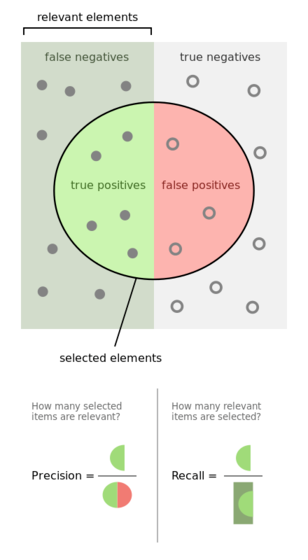

### Пример. Наша самодельная классификация

In [7]:
from sklearn.model_selection import train_test_split

np.random.seed(1337)
n = 1000
a = np.random.normal(loc=0, scale=0.7, size=(n, 2)) #первый класс
b = np.random.normal(loc=1, scale=0.7, size=(n, 2)) #второй класс
X = np.vstack([a, b]) #двумерный количественный признак
y = np.hstack([np.zeros(n), np.ones(n)]) #бинарный признак

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

(1800, 2) (1800,)


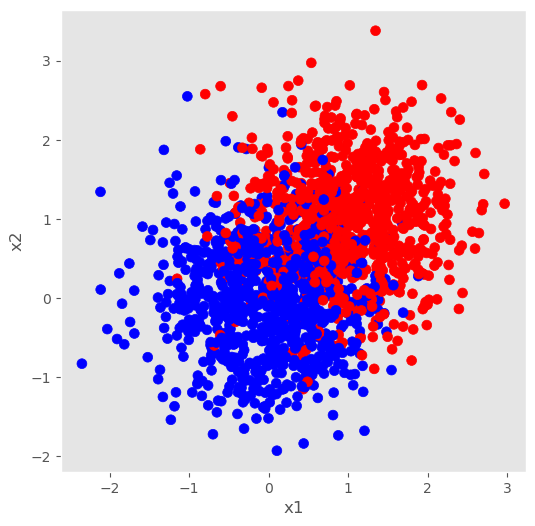

In [8]:
print(X_train.shape, y_train.shape)
plt.figure(figsize=(6, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', s=50, alpha=1)
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier as KNN
clf = KNN(10)

И проведем кроссвалидацию по 3-м разным метрикам. В том числе напишем свою. 

In [13]:
acc_score = cross_val_score(clf, X_train, y_train, cv=5, 
                            scoring=metrics._scorer.accuracy_scorer)

nll = cross_val_score(clf, X_train, y_train, cv=5, 
                      scoring=metrics._scorer.neg_log_loss_scorer)

def my_score(y, y_pred):
    return ((y_pred - y)**2).sum()

my_score = cross_val_score(clf, X_train, y_train, cv=5, 
                           scoring=metrics.make_scorer(my_score))

In [14]:
acc_score, nll, my_score

(array([0.825     , 0.8       , 0.81666667, 0.85      , 0.83333333]),
 array([-0.54016588, -1.05387983, -1.31701132, -0.6101144 , -0.81650605]),
 array([63., 72., 66., 54., 60.]))

## [ROC-кривая и AUC](https://towardsdatascience.com/receiver-operating-characteristic-curves-demystified-in-python-bd531a4364d0)

Пусть наш алгоритм предсказывает не только значения, но и **вероятности** получить то или иное значение. Возьмем массив вероятностей получить 1.

In [15]:
model = clf.fit(X_train, y_train)
y_prob = model.predict_proba(X_test)
y_prob1 = y_prob[:,1]

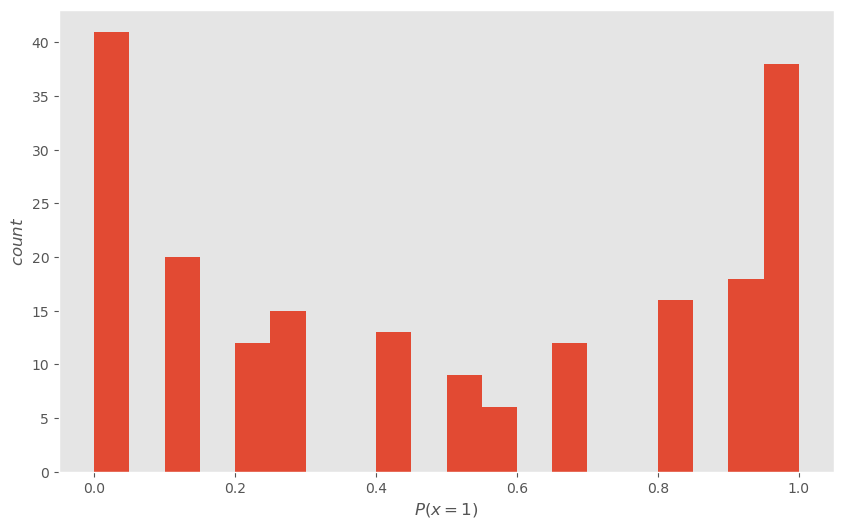

In [16]:
plt.hist(y_prob1, bins=20)
plt.xlabel('$P(x = 1)$')
plt.ylabel('$count$')
plt.grid()

А теперь разделим на наши классы, которые верно классифицировались и не верно классифицировались.

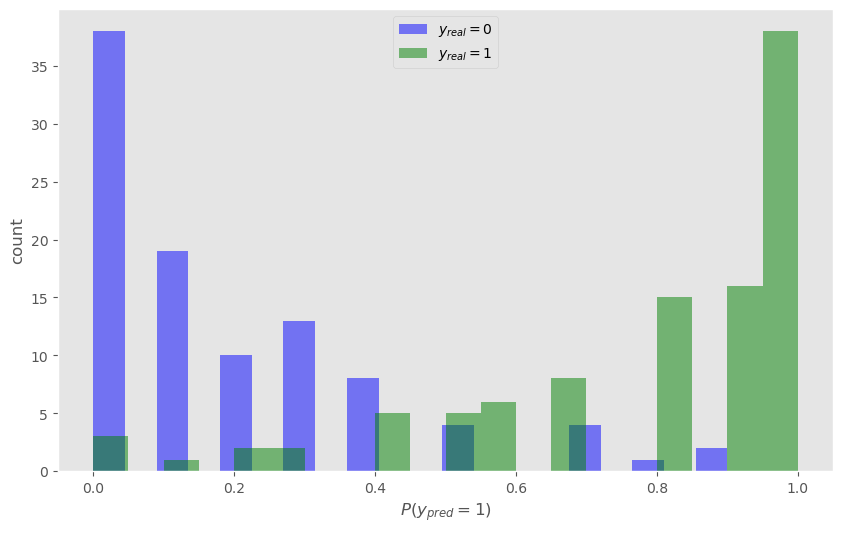

In [17]:
table = np.hstack((y_prob1.reshape((-1,1)), y_test.reshape((-1,1))))
zero_pred = table[table[:,1]==0]
ones_pred = table[table[:,1]==1]
plt.hist(zero_pred[:,0], bins=20, color='blue', alpha=0.5, label='$y_{real}=0$')
plt.hist(ones_pred[:,0], bins=20, color='green', alpha=0.5, label='$y_{real}=1$')
plt.ylabel('count')
plt.xlabel('$P(y_{pred} = 1)$')
plt.legend()
plt.grid()

### ROC-кривая и AUC

**ROC-кривая** (Receiver Operating Characteristic) - это графическая характеристика качества бинарного классификатора, выражающая зависимость `TPR` от `FPR` при варьировании порога решающего правила.

**Порог решающего правила**(`threshold`): при какой вероятности мы присваиваем объекту класс 1.

Мы двигаемся справа налево и считаем `TPR` и `FPR` следующим образом: 
* TP - зеленые справа от порога.
* FP - синие справа от порога.
* TN - синие слева от порога.
* FN - зеленые слева от порога.

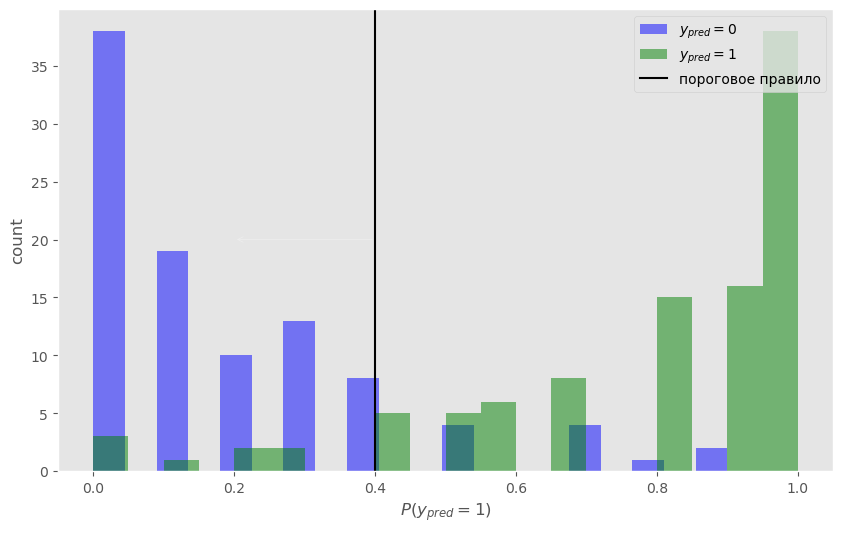

In [18]:
table = np.hstack((y_prob1.reshape((-1,1)), y_test.reshape((-1,1))))
zero_pred = table[table[:,1]==0]
ones_pred = table[table[:,1]==1]
plt.hist(zero_pred[:,0], bins=20, color='blue', alpha=0.5, label='$y_{pred}=0$')
plt.hist(ones_pred[:,0], bins=20, color='green', alpha=0.5, label='$y_{pred}=1$')
plt.axvline(x=0.4, c='black', label='пороговое правило')
plt.annotate("", xy=(0.2, 20), xytext=(0.4, 20), arrowprops=dict(arrowstyle="->"))
plt.ylabel('count')
plt.xlabel('$P(y_{pred} = 1)$')
plt.legend()
plt.grid()

Так пройдя все возможные значения для `TPR` и `FPR` мы получим несколько координат точек, по которым сможем нарисовать ROC-кривую.

Функция, которая за нас все посчитает: 

In [19]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_prob1)

In [20]:
fpr, tpr

(array([0.        , 0.        , 0.02020202, 0.03030303, 0.07070707,
        0.07070707, 0.11111111, 0.19191919, 0.32323232, 0.42424242,
        0.61616162, 1.        ]),
 array([0.        , 0.37623762, 0.53465347, 0.68316832, 0.76237624,
        0.82178218, 0.87128713, 0.92079208, 0.94059406, 0.96039604,
        0.97029703, 1.        ]))

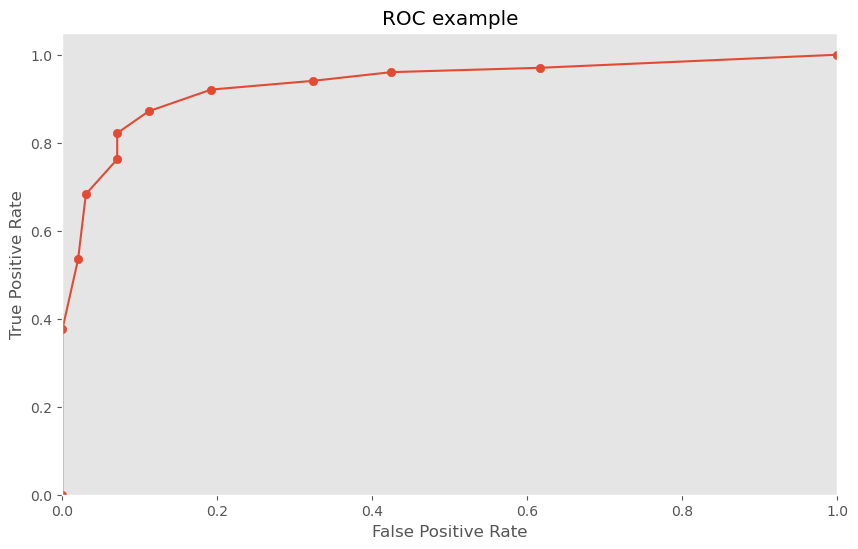

In [21]:
plt.figure()
plt.scatter(fpr, tpr)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC example')
plt.grid()
plt.show()

ROC-кривая проходит через точки (0, 0) и (1, 1) и монотонно не убывает. Чем ближе кривая внутри квадрата $[0, 1]\times[0, 1]$ к левому верхнему углу, тем лучше. Идеальный вариант - кривая, проходящая через три точки: (0, 0), (1, 1) и (0, 1). Диагональ данного квадрата соответствует случайному гаданию.

#### AUC - площадь под графиком ROC. Это важный показатель качества классификации.

Про AUC-ROC хорошо написано [тут](http://dyakonov.org/2017/07/28/auc-roc-площадь-под-кривой-ошибок/), рекомендую

In [22]:
roc_auc = metrics.auc(fpr, tpr)
roc_auc

0.9327932793279328

### А что будет, если у нас классы будут полностью пересекаться?

In [23]:
np.random.seed(1337)
n = 1000
a = np.random.normal(loc=0, scale=0.7, size=(n, 2)) #первый класс
b = np.random.normal(loc=0, scale=0.7, size=(n, 2)) #второй класс
X = np.vstack([a, b]) #двумерный количественный признак
y = np.hstack([np.zeros(n), np.ones(n)]) #бинарный признак

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

(1800, 2) (1800,)


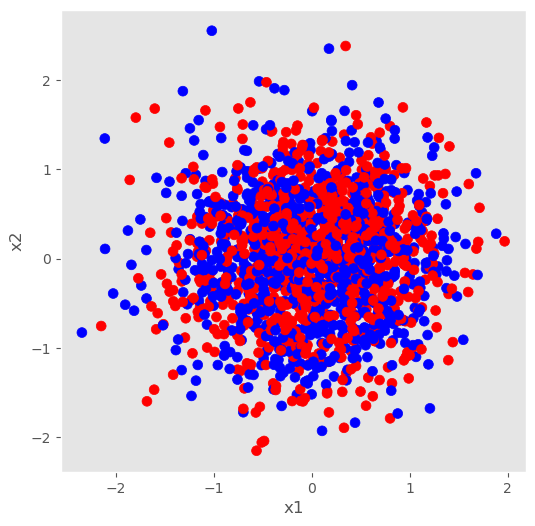

In [24]:
print(X_train.shape, y_train.shape)
plt.figure(figsize=(6, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', s=50, alpha=1)
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()

In [25]:
model = clf.fit(X_train, y_train)
y_prob = model.predict_proba(X_test)
y_prob1 = y_prob[:,1]

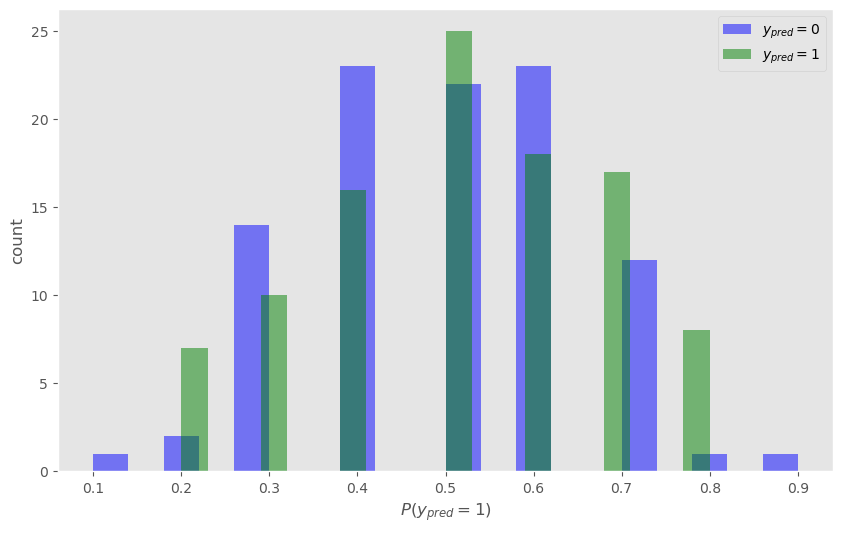

In [26]:
table = np.hstack((y_prob1.reshape((-1,1)), y_test.reshape((-1,1))))
zero_pred = table[table[:,1]==0]
ones_pred = table[table[:,1]==1]
plt.hist(zero_pred[:,0], bins=20, color='blue', alpha=0.5, label='$y_{pred}=0$')
plt.hist(ones_pred[:,0], bins=20, color='green', alpha=0.5, label='$y_{pred}=1$')
plt.ylabel('count')
plt.xlabel('$P(y_{pred} = 1)$')
plt.legend()
plt.grid()

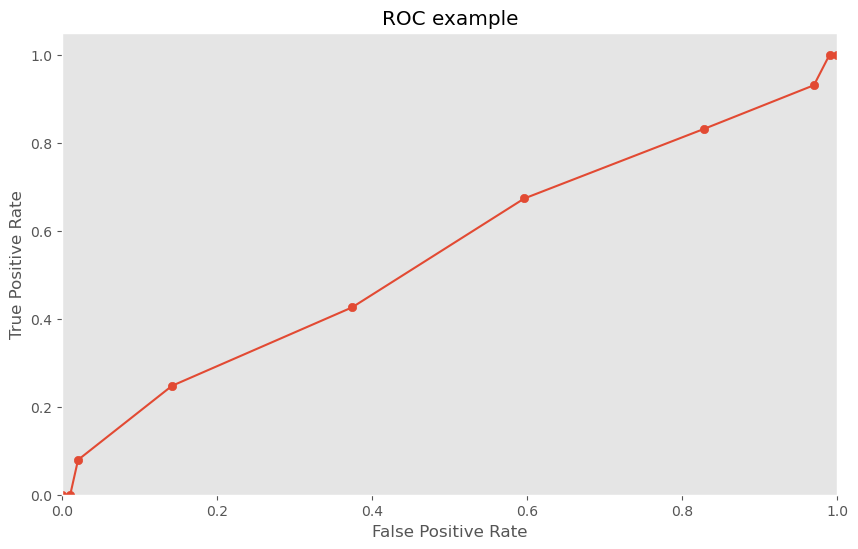

In [27]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_prob1)
plt.figure()
plt.scatter(fpr, tpr)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC example')
plt.grid()
plt.show()

Roc близка к диагонали - это значит, что классификатор распределяет классы не лучше случайно подброшенной монетки. С вероятностью $0.5$ у нас может появиться любой класс.

In [28]:
np.random.seed(1337)
n = 1000
a = np.random.normal(loc=0, scale=0.7, size=(n, 2)) #первый класс
b = np.random.normal(loc=5, scale=0.7, size=(n, 2)) #второй класс
X = np.vstack([a, b]) #двумерный количественный признак
y = np.hstack([np.zeros(n), np.ones(n)]) #бинарный признак

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

(1800, 2) (1800,)


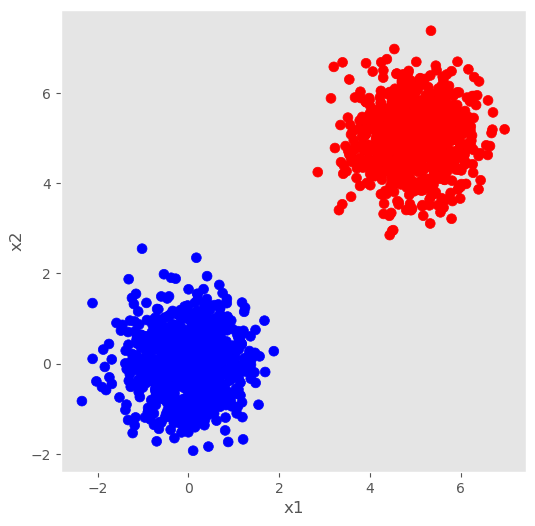

In [29]:
print(X_train.shape, y_train.shape)
plt.figure(figsize=(6, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', s=50, alpha=1)
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()

In [30]:
model = clf.fit(X_train, y_train)
y_prob = model.predict_proba(X_test)
y_prob1 = y_prob[:,1]

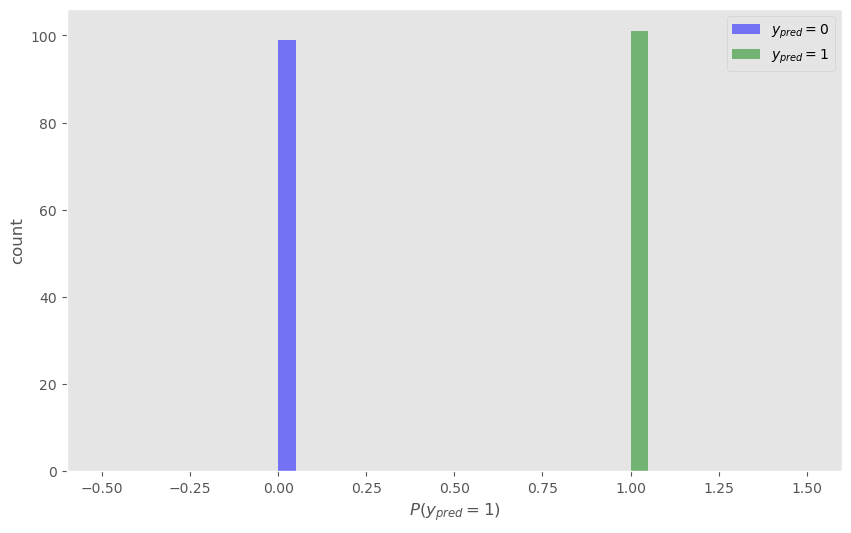

In [31]:
table = np.hstack((y_prob1.reshape((-1,1)), y_test.reshape((-1,1))))
zero_pred = table[table[:,1]==0]
ones_pred = table[table[:,1]==1]
plt.hist(zero_pred[:,0], bins=20, color='blue', alpha=0.5, label='$y_{pred}=0$')
plt.hist(ones_pred[:,0], bins=20, color='green', alpha=0.5, label='$y_{pred}=1$')
plt.ylabel('count')
plt.xlabel('$P(y_{pred} = 1)$')
plt.legend()
plt.grid()

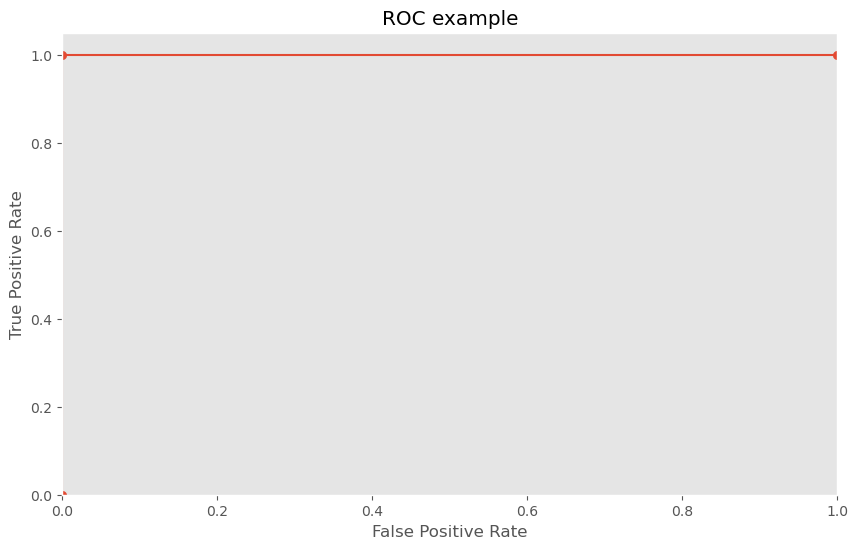

In [32]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_prob1)
plt.figure()
plt.scatter(fpr, tpr)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC example')
plt.grid()
plt.show()

Roc-кривая близка к диагонали, что означает, что наш классификатор бесполезен и работает не лучше рандома.

## Регрессия

Для регрессии также существуют свои метрики качества, например 
$$R^2 = 1 - \frac{\sum_{i=1}^{n}(a(x^{(i)}) - y^{(i)}_{real})^2}{\sum_{i=1}^{n}(y^{(i)}_{real} - \overline{y})^2}\quad \overline{y} = \frac{1}{n}\sum_{i=1}^{n}y^{(i)}_{real}$$

Вызывается она аналогичным образом

In [33]:
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
metrics.r2_score(y_true, y_pred)  

0.9486081370449679

# Кросс-валидация

<img src=https://i.stack.imgur.com/YWgro.gif>

`Идея`: разобъем нашу выборку на 5 равнозначных частей. Одну часть - сделаем тестовой выборкой, а оставшееся оставим в тренировочной выборке. Таким образом мы получим 5 комбинаций тренировочных и тестовых выборок. 

А теперь обучим наш алгоритм 5 раз на разных выборках и посмотрим `насколько хорошо` предсказывает наш алгоритм результат для разных выборок.

В случае классификации под `настолько хорошо` будем обозначать **долю правильных ответов** (`accuracy`). А вообще это целая большая тема под названием `Метрики`, которой мы займемся в следующий раз.

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris

iris = load_iris()

clf_1 = DecisionTreeClassifier(max_depth=2)
clf_2 = DecisionTreeClassifier(max_depth=3)

accuracies1 = cross_val_score(clf_1, X = iris.data, y=iris.target, cv=5)
accuracies2 = cross_val_score(clf_2, X = iris.data, y=iris.target, cv=5)

In [38]:
accuracies1.mean(), accuracies2.mean()

(0.9333333333333332, 0.96)

Получаем, что в среднем более глубокое дерево для Iris, работает лучше.

## Полезные ссылки:
* [Статья про метрики](https://habrahabr.ru/company/ods/blog/328372/)
* [Roc-auc](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5)
* [Связь AUC-ROC и AUC-PR](http://pages.cs.wisc.edu/~jdavis/davisgoadrichcamera2.pdf)
* [Ultimate guide to Binary Classifiction Metrics](https://towardsdatascience.com/the-ultimate-guide-to-binary-classification-metrics-c25c3627dd0a)

- [Статья](http://habrahabr.ru/post/228963/) "Как заставить работать бинарный классификатор чуточку лучше" на Habrahabr
- [ROC-кривая](http://www.machinelearning.ru/wiki/index.php?title=ROC-%D0%BA%D1%80%D0%B8%D0%B2%D0%B0%D1%8F)
- [Характеристики](https://en.wikipedia.org/wiki/Precision_and_recall) бинарного классификатора
- [Quora](https://www.quora.com/In-classification-how-do-you-handle-an-unbalanced-training-set) про несбаланированные выборки
- про несбаланированные выборки на [ресурсе](http://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/) Machine Learning Mastery